In [1]:
import ModelProject as model

### 1. Model Introduction:

In the Solow model, the key variables are capital stock $K$ and output $Y$. The model assumes that capital and labor inputs combine to produce output according to a neoclassical production function, with diminishing returns to capital.

The basic Solow model equations become:

$$
Y = AK^\alpha
$$

$$
K_t = sY_t + (1-\delta)K_{t-1}
$$

Where:
- $Y$ = Output
- $K$ = Capital stock
- $A$ = Total factor productivity (constant in this simplified version)
- $s$ = Savings rate
- $\delta$ = Depreciation rate
- $\alpha$ = Capital share in output


### 2. Algorithm Description:

To solve the simplified Solow model, we use the Newton-Raphson method to approximate to find the solution.

#### 2.1 Newton-Raphson Method Algorithm

1. **Initialize**: Choose an initial guess $x_0$ for the root of the function $f(x)$.
   
2. **Iterate**:
   - **Step 1**: Compute the function value $f(x_i)$ and its derivative $f'(x_i)$ at the current guess $x_i$.
   - **Step 2**: Compute the next approximation using the update rule:
     $x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$
   
3. **Convergence Check**:
   - Check if the absolute difference between consecutive approximations $|x_{i+1} - x_i|$ is less than a predefined tolerance level $\epsilon$.
   - If the convergence criterion is satisfied, consider $x_{i+1}$ as the root and terminate the iteration.
   
4. **Termination Conditions**:
   - If the maximum number of iterations $N$ is reached without satisfying the convergence criterion, terminate the iteration without convergence.
   - Alternatively, terminate the iteration if $f(x)$ becomes zero or sufficiently close to zero.

#### 2.2 Explanation:

- The Newton-Raphson method is an iterative root-finding algorithm that uses both the function value and its derivative to approximate the roots of a real-valued function $f(x)$.
- It starts with an initial guess $x_0$ and iteratively refines this guess by using the tangent line to the function at the current guess.
- However, the method may fail to converge or converge to a local minimum if the initial guess is far from the root or for certain types of functions (e.g., those with multiple roots or singularities).
- Convergence criteria typically involve checking the absolute difference between consecutive approximations and/or the function value reaching zero or becoming sufficiently close to zero.






### 3. Steady-State Solution for $k^*$

In the Solow growth model, the steady-state level of capital per effective worker $k^*$ can be derived analytically and mathematically. Both solutions can be found below. 

#### 3.1. Standard Solow Model Steady State Plot

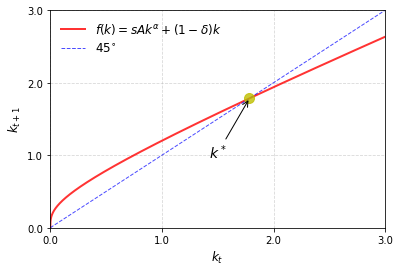

In [2]:
# Setting model parameters for the Standard Solow Model and the Extended Solow Model
A_val, s_val, alpha_val, delta_val, n_val, g_val = 3, 0.2, 0.3, 0.4, 0.05, 0.05
x_init_val = 0.25
x_min_val, x_max_val = 0, 3

# Calculating the steady-state capital
k_star_val = model.find_steady_state_capital(A_val, s_val, alpha_val, delta_val)

model.plot_diagonal(k_star_val)

#### 3.2. Standard Solow Model Steady State Capital

In [3]:
print("Steady-state capital (k*):", k_star_val)

Steady-state capital (k*): 1.7846717852029474


Using the Newton-Raphson method the steady state value has been found to be approximately 1.78 for the basic solow model. 

### 4. Different Scenarios Effect on Steady State

In this part of the code, different parametarizations will be analyzed for the basic solow model, to analyze the effect that the different parameters have on the steady state capital.

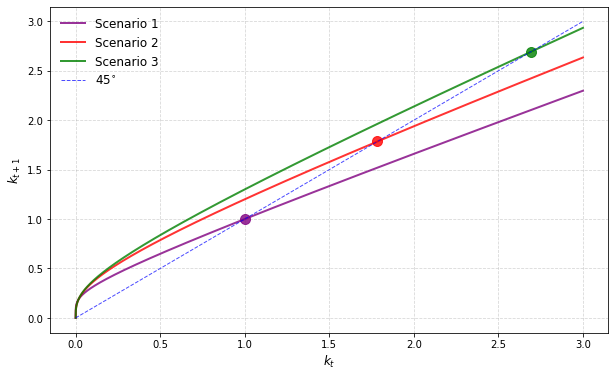

In [4]:
# Different parameters
parameters = [
    {'A': 2, 's': 0.2, 'alpha': 0.2, 'delta': 0.4, 'color': 'purple', 'label': 'Scenario 1'},
    {'A': 3, 's': 0.2, 'alpha': 0.3, 'delta': 0.4, 'color': 'red', 'label': 'Scenario 2'},
    {'A': 2, 's': 0.3, 'alpha': 0.3, 'delta': 0.3, 'color': 'green', 'label': 'Scenario 3'}
]

k_star_values = model.plot_scenarios(parameters)

#### 4.1 Steady State Values

In [5]:
print("Steady-state capital (k*) for each scenario:", k_star_values)

Steady-state capital (k*) for each scenario: [1.0, 1.7846717852029474, 2.6917966845670342]


#### 4.2 Analysis of Different Steady State Capitals in the Solow Model

The specific level of $k^*$ depends on the model parameters, such as the savings rate $s$, the capital share in output $\alpha$, the depreciation rate $\delta$, and the level of technological progress $A$.

The three scenarios resulted in 3 different steady state capital values:

1. **Scenario 1**:
   - Parameters: $A = 2$, $s = 0.2$, $\alpha = 0.2$, $\delta = 0.4$
   - Steady-state capital $k^* = 1.0$

2. **Scenario 2**:
   - Parameters: $A = 3$, $s = 0.2$, $\alpha = 0.3$, $\delta = 0.4$
   - Steady-state capital $k^* = 1.78$

3. **Scenario 3**:
   - Parameters: $A = 2 $, $s = 0.3$, $\alpha = 0.3$, $\delta = 0.3$
   - Steady-state capital $ k^* = 2.69$

**Analysis**:

1. **Effect of Technological Progress $(A)$**:
In Scenario 2, where $(A = 3$, we observe a higher steady-state capital $(k^*)$ compared to Scenario 1 where $A = 2$. This suggests that higher levels of technological progress lead to higher levels of steady-state capital accumulation.

2. **Effect of Savings Rate $(s)$**:
In Scenario 3, where $s = 0.3$, we observe a higher steady-state capital $(k^*)$ compared to Scenario 1 where $s = 0.2$. This indicates that higher savings rates lead to higher levels of steady-state capital accumulation.

3. **Effect of Capital Share in Output $(\alpha)$**:
Comparing Scenarios 2 and 3, where both $\alpha = 0.3$, we see that increasing the capital share in output does not significantly impact the steady-state capital level $(k^*)$. This suggests that changes in the capital share have a relatively minor effect on steady-state capital accumulation compared to technological progress and savings rate changes.

Higher levels of technological progress and savings rate generally lead to higher steady-state capital levels, while changes in the capital share have a relatively smaller impact.



### 5. Enhanced Solow Model with Population and Productivity Growth:

In a more comprehensive Solow model, we incorporate population growth ($n$) and technological progress ($g$) into the analysis. These additions allow for a deeper understanding of how changes in these factors affect long-run economic growth.

The extended Solow model equations become:

$$
Y = AK^\alpha L^{1-\alpha}
$$

$$
K_t = sY_t + (1-\delta)K_{t-1}
$$

$$
L_t = (1 + n)L_{t-1}
$$

$$
A_t = (1 + g)A_{t-1}
$$

Where:
- $Y$ = Output
- $K$ = Capital stock
- $L$ = Labor force (population)
- $A$ = Technological progress
- $s$ = Savings rate
- $\delta$ = Depreciation rate
- $n$ = Population growth rate
- $g$ = Technological progress rate
- $\alpha$ = Capital share in output

This augmented model allows us to examine the interplay between capital accumulation, population growth, and technological progress in determining the long-run equilibrium of an economy. It provides insights into how changes in these factors influence economic growth rates and living standards over time.



### 6. Extended Solow Model Steady State Plot

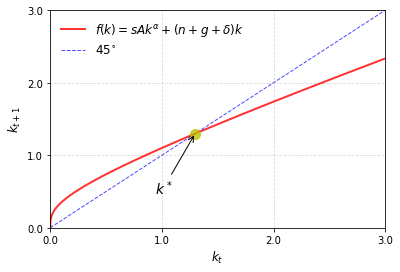

In [6]:
# Calculate the steady-state level of capital per effective worker (k*)
k_star = model.find_steady_state_extended(A_val, s_val, alpha_val, delta_val, n_val, g_val)

# Plot the 45-degree line and the f(k) function
model.plot_diagonal(k_star,1)

#### 6.1. Extended Solow Model Steady State Capital

In [7]:
print("Steady-state level of capital per effective worker (k*):", k_star)

Steady-state level of capital per effective worker (k*): 1.2975259902111052


Using the Newton-Raphson method the steady state value has been found to be approximately 1.29 for the extended solow model. 

#### 6.2 Analysis of Extended Solow Model on Steady State Capital

The extended Solow model introduces population growth $(n)$ and technological progress $(g)$ into the analysis, which have significant effects on the steady-state level of capital per effective worker $(k^*)$ compared to the basic Solow model.

1. **Effect of Population Growth $(n)$**:
   - In the extended Solow model, the presence of population growth leads to a lower steady-state capital level compared to the basic Solow model. This is because an increase in population growth means that there are more workers in the economy, which increases the demand for capital. However, the rate of capital accumulation may not be sufficient to keep up with the growing population, leading to a lower capital per effective worker in the long run.

2. **Effect of Technological Progress $(g)$**:
   - The extended Solow model also incorporates technological progress, which affects the steady-state capital level. Higher levels of technological progress $(g)$ lead to an increase in the productivity of capital and labor, allowing the economy to produce more output with the same amount of capital. As a result, higher technological progress tends to increase the steady-state level of capital per effective worker.

3. **Combined Effect of $n$ and $g$**:
   - The extended Solow model with population growth $(n)$ and technological progress $(g)$ results in a lower steady-state capital level $(k^*)$ compared to the basic Solow model without these factors. This suggests that the negative impact of population growth on capital accumulation outweighs the positive impact of technological progress in this specific scenario.
